In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')
dataset1 = dataset.drop(["country","agent","company","reservation_status",
                  "arrival_date_year","arrival_date_month","deposit_type","reservation_status_date","customer_type","market_segment","distribution_channel","meal","reserved_room_type","assigned_room_type"] , axis=1)

In [3]:
onehotvector_list =["hotel"]
one_hotencoding = pd.get_dummies(dataset1[onehotvector_list])
transf_df = pd.concat([one_hotencoding,dataset1],axis = 1)
transf_df["children"].fillna( method ='ffill', inplace = True) 

In [4]:
dataset1 = transf_df.drop(["hotel"] , axis=1)
samp=dataset1.sample(n=50000)

In [5]:
X1 = samp.drop(columns=["is_canceled"],axis = 1)    
Y1 = samp["is_canceled"]  

In [6]:
from sklearn.preprocessing import StandardScaler
dataset_sc_LogReg = StandardScaler()
X_Scaled = dataset_sc_LogReg.fit_transform(X1)


In [17]:
X_Scaled.shape

(50000, 18)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as Sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neural_network import MLPClassifier

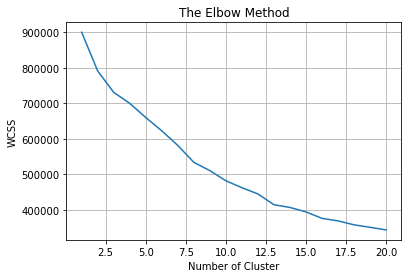

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,21):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_Scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,21),wcss)
plt.grid()
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters= 5, 
                init = "k-means++" , 
                max_iter= 500 , 
                n_init= 10 , 
                random_state= 0)

y_kmeans_energy = kmeans.fit_predict(X_Scaled)


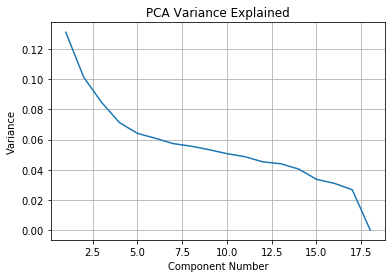

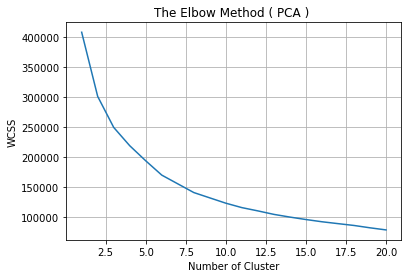

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
X_energy_PCA = pca.fit_transform(X_Scaled)
#X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1,19),explained_variance)
plt.title("PCA Variance Explained")
plt.xlabel("Component Number")
plt.ylabel("Variance")
plt.grid()
plt.show()

pca_final_energy = PCA(n_components = 5 )
X_PCA = pca_final_energy.fit_transform(X_Scaled)

### Finding the number of clusters 
wcss_energy_pca = []
for i in range (1,21):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_PCA)
    wcss_energy_pca.append(kmeans.inertia_)

plt.plot(range(1,21),wcss_energy_pca)
plt.title("The Elbow Method ( PCA ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()



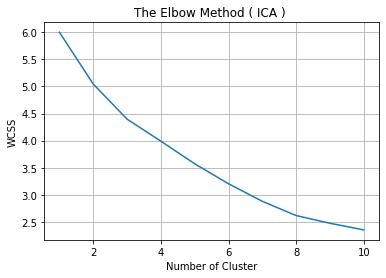

In [41]:
from sklearn.decomposition import FastICA
ica = FastICA(tol = 1e-2, max_iter = 1000, n_components =6)
X_churn_ICA = ica.fit_transform(X_Scaled)

wcss_churn_ica = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_churn_ICA)
    wcss_churn_ica.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_churn_ica)
plt.title("The Elbow Method ( ICA ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

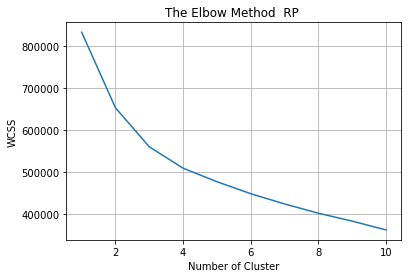

In [24]:
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(eps = 0.1, n_components = 7)
X_churn_RP = srp.fit_transform(X_Scaled)

wcss_churn_ra = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_churn_RP)
    wcss_churn_ra.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_churn_ra)
plt.title("The Elbow Method  RP ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

Optimal number of features : 13
[5 2 1 1 1 1 1 1 4 6 3 1 1 1 1 1 1 1]


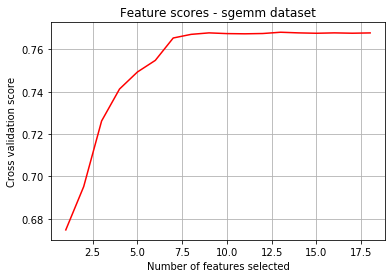

In [25]:
from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
rfecv = RFECV(estimator=dt, step=1, cv=5, n_jobs=-1,
              scoring='accuracy')
rfecv.fit(X_Scaled, Y1)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.ranking_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.grid()
plt.title("Feature scores - sgemm dataset")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='red')
plt.show()

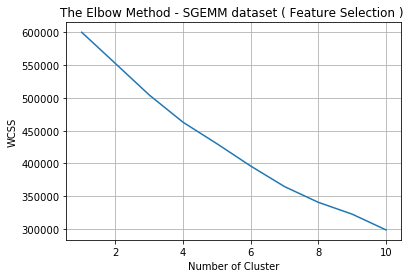

In [27]:
X_sgemm_scaled_FS = X_Scaled[:,(2,3,4,5,6,7,11,12,13,14,15,16)]

wcss_sgemm_FS = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_sgemm_scaled_FS)
    wcss_sgemm_FS.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_sgemm_FS)
plt.title("The Elbow Method - SGEMM dataset ( Feature Selection ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

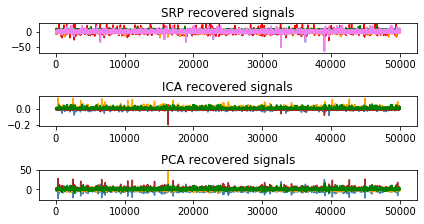

In [28]:
plt.figure()
models = [X_churn_RP,X_churn_ICA, X_PCA]
names = ['SRP recovered signals',
        'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange', 'brown', 'green', 'violet']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [29]:
#ANN
X_train ,X_test, y_train , y_test = train_test_split(X_Scaled, Y1, test_size = 0.25 , random_state = 0)

### Original ANN 
ANN_class = MLPClassifier(hidden_layer_sizes= (25,25,25,25),
                          activation='relu',
                          alpha=0.0001,
                          batch_size='auto',
                          solver= 'sgd',
                          learning_rate= 'constant',
                          random_state= 0 )

ANN_class.fit(X_train, y_train.ravel())

### predicting the test set result
y_pred = ANN_class.predict(X_test)
y_expect= y_test

### Finding the accuracy
Result = accuracy_score(y_expect , y_pred)
print(Result)


0.77736


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
X_train ,X_test, y_train , y_test = train_test_split(X_churn_RP, Y1, test_size = 0.25 , random_state = 0)
ANN_class_Energy =  MLPClassifier(hidden_layer_sizes= (25,25,25,25),
                          activation='relu',
                          alpha=0.0001,
                          batch_size='auto',
                          solver= 'sgd',
                          learning_rate= 'constant',
                          random_state= 0 )

ANN_class_Energy.fit(X_train, y_train.ravel())

### predicting the test set result
y_pred_sgemm = ANN_class_Energy.predict(X_test)
y_expect_sgemm = y_test

### Finding the accuracy
Result_sgemm = accuracy_score(y_expect_sgemm , y_pred_sgemm)
print("The accuracy is \n",Result_sgemm)

### create confusion matrix
cm_sgemm = confusion_matrix(y_test , y_pred_sgemm)
print("\n THe confusion matrix is:\n", cm_sgemm)

The accuracy is 
 0.71112

 THe confusion matrix is:
 [[6590 1245]
 [2366 2299]]


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
X_train ,X_test, y_train , y_test = train_test_split(X_PCA, Y1, test_size = 0.25 , random_state = 0)
ANN_class_Energy =  MLPClassifier(hidden_layer_sizes= (25,25,25,25),
                          activation='relu',
                          alpha=0.0001,
                          batch_size='auto',
                          solver= 'sgd',
                          learning_rate= 'constant',
                          random_state= 0 )

ANN_class_Energy.fit(X_train, y_train.ravel())

### predicting the test set result
y_pred_sgemm = ANN_class_Energy.predict(X_test)
y_expect_sgemm = y_test

### Finding the accuracy
Result_sgemm = accuracy_score(y_expect_sgemm , y_pred_sgemm)
print("The accuracy is \n",Result_sgemm)

### create confusion matrix
cm_sgemm = confusion_matrix(y_test , y_pred_sgemm)
print("\n THe confusion matrix is:\n", cm_sgemm)

The accuracy is 
 0.734

 THe confusion matrix is:
 [[6838  997]
 [2328 2337]]


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
X_train ,X_test, y_train , y_test = train_test_split(X_sgemm_scaled_FS, Y1, test_size = 0.25 , random_state = 0)
ANN_class_Energy =  MLPClassifier(hidden_layer_sizes= (25,25,25,25),
                          activation='relu',
                          alpha=0.0001,
                          batch_size='auto',
                          solver= 'sgd',
                          learning_rate= 'constant',
                          random_state= 0 )

ANN_class_Energy.fit(X_train, y_train.ravel())

### predicting the test set result
y_pred_sgemm = ANN_class_Energy.predict(X_test)
y_expect_sgemm = y_test

### Finding the accuracy
Result_sgemm = accuracy_score(y_expect_sgemm , y_pred_sgemm)
print("The accuracy is \n",Result_sgemm)

### create confusion matrix
cm_sgemm = confusion_matrix(y_test , y_pred_sgemm)
print("\n THe confusion matrix is:\n", cm_sgemm)

The accuracy is 
 0.73392

 THe confusion matrix is:
 [[6829 1006]
 [2320 2345]]


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [38]:
from sklearn.mixture import GaussianMixture as mixture
cov_type = ['tied', 'diag', 'full','spherical']
number_of_components = range(1,18,1)
appendAicValues = []
step = 0
for i in range(0, len(cov_type)):
    for j in range(0, len(number_of_components)):
        g = mixture(covariance_type = cov_type[i],
        n_components = number_of_components[j],random_state = 10).fit(X_Scaled)
        appendAicValues.append(g.bic(X_Scaled))
        step = step + 1
        print("Step : ", step , "/", len(cov_type) * len(number_of_components))

Step :  1 / 68
Step :  2 / 68
Step :  3 / 68
Step :  4 / 68
Step :  5 / 68
Step :  6 / 68
Step :  7 / 68
Step :  8 / 68
Step :  9 / 68
Step :  10 / 68
Step :  11 / 68
Step :  12 / 68
Step :  13 / 68
Step :  14 / 68
Step :  15 / 68
Step :  16 / 68
Step :  17 / 68
Step :  18 / 68
Step :  19 / 68
Step :  20 / 68
Step :  21 / 68
Step :  22 / 68
Step :  23 / 68
Step :  24 / 68
Step :  25 / 68
Step :  26 / 68
Step :  27 / 68
Step :  28 / 68
Step :  29 / 68
Step :  30 / 68
Step :  31 / 68
Step :  32 / 68
Step :  33 / 68
Step :  34 / 68
Step :  35 / 68
Step :  36 / 68
Step :  37 / 68
Step :  38 / 68
Step :  39 / 68
Step :  40 / 68
Step :  41 / 68
Step :  42 / 68
Step :  43 / 68
Step :  44 / 68
Step :  45 / 68
Step :  46 / 68
Step :  47 / 68
Step :  48 / 68
Step :  49 / 68
Step :  50 / 68
Step :  51 / 68
Step :  52 / 68
Step :  53 / 68
Step :  54 / 68
Step :  55 / 68
Step :  56 / 68
Step :  57 / 68
Step :  58 / 68
Step :  59 / 68
Step :  60 / 68
Step :  61 / 68
Step :  62 / 68
Step :  63 / 68
S

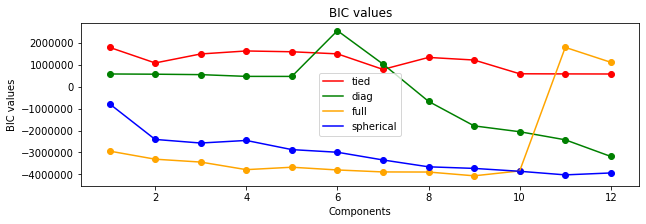

In [39]:
steps  =  np.arange(1,13,1)
plt.figure(figsize=(10,3)) 
plt.scatter(steps,appendAicValues[0:12],  color='red')
plt.plot(steps,appendAicValues[0:12],  color='red',  label ='tied') 
plt.scatter(steps,appendAicValues[12:24],  color='green') 
plt.plot(steps,appendAicValues[12:24],  color='green',  label='diag') 
plt.scatter(steps,appendAicValues[24:36],  color='orange' ) 
plt.plot(steps,appendAicValues[24:36],  color='orange',  label='full') 
plt.scatter(steps,appendAicValues[36:48],  color='blue') 
plt.plot(steps,appendAicValues[36:48],  color='blue',  label='spherical')
plt.xlabel('Components')
plt.ylabel('BIC values') 
plt.legend() 
plt.title('BIC values') 
plt.show()

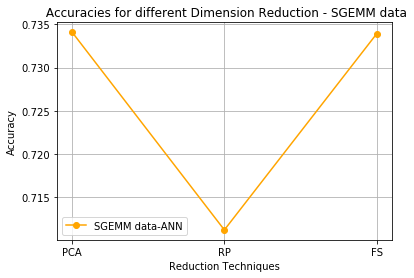

In [42]:
accuracies_sgemm= [ 0.7341 , 0.7112 , 0.7339 ]
accuracies_type = ['PCA','RP','FS' ]
plt.plot(accuracies_type , accuracies_sgemm , marker='o',markersize=6,color='orange',label='SGEMM data-ANN')
plt.title(" Accuracies for different Dimension Reduction - SGEMM data")
plt.xlabel("Reduction Techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

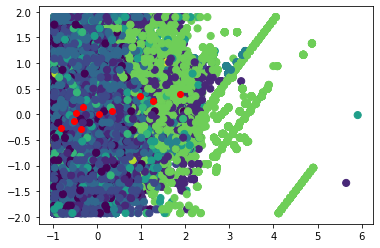

In [44]:
x_k_means_2_sel = np.array(X_sgemm_scaled_FS)
kmeans = KMeans(algorithm = "full",n_clusters=10,random_state=10).fit(x_k_means_2_sel)
y_kmeans = kmeans.predict(x_k_means_2_sel)
plt.scatter(x_k_means_2_sel[:, 0], x_k_means_2_sel[:, 1],
c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red')
plt.show()